In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the data

In [2]:
df = pd.read_parquet('../Data/features_tfidf.parquet.gz')
df.head()

,bagsandluggage,beautyandhealth,capsandhats,drinkware,homeandkitchen,hoodiesandjackets,kidsapparel,office,petsupplies,sportsandfitness,tees
CustomerID,,,,,,,,,,,
12346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.745408,0.0,0.000000,0.666608
12347,0.155289,0.000000,0.106051,0.128543,0.709425,0.100291,0.058372,0.449272,0.0,0.099013,0.468740
12348,0.000000,0.000000,0.000000,0.313489,0.164774,0.000000,0.284711,0.639144,0.0,0.241472,0.571577
12350,0.000000,0.000000,0.570106,0.000000,0.726422,0.000000,0.000000,0.000000,0.0,0.133069,0.359978
12356,0.088599,0.189432,0.000000,0.220018,0.231290,0.171661,0.199821,0.448575,0.0,0.169474,0.745001


# Mean scaling

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data simultaneously
X = scaler.fit_transform(df.to_numpy())

# PCA

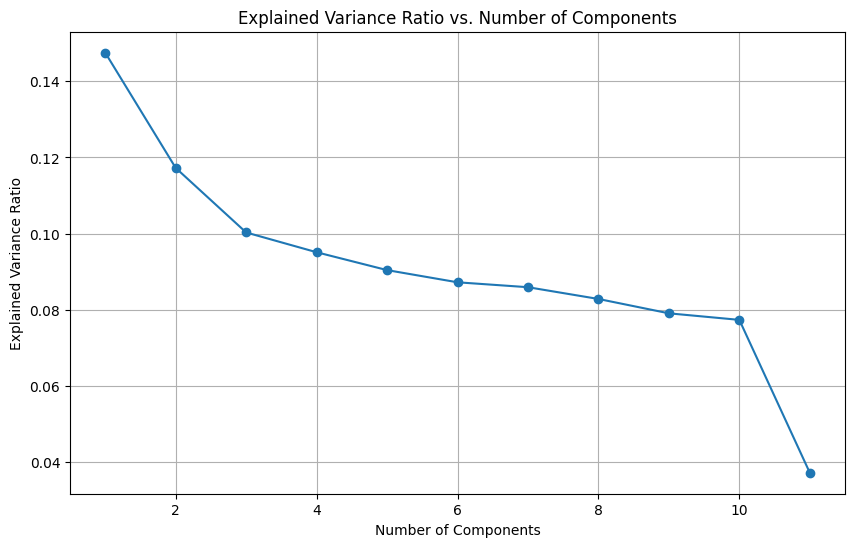

In [4]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA to the mean-scaled data
pca.fit(X)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

NOTE: Keep 5 principal components.

In [5]:
pca = PCA(n_components=5)

# Fit PCA to the mean-scaled data and transform it
X = pca.fit_transform(X)

# Clustering

### 1. K-Means

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Store the evaluation scores
inertia = []
silhouette_scores = []
ch_score = []
davies_bouldin_scores = []

# Try several K number of clusters
k_values = range(3, 10)
for k in k_values:
    print(f"k = {k}")

    # Storing the raw scores for each model
    inertia_samples = []
    silhouette_score_samples = []
    ch_score_samples = []
    db_score_samples = []

    # Cluster 10 times to get the average scores
    for _ in range(10):
        print(f"\tj = {_}")
        
        # Clustering Step
        kmeans = KMeans(n_clusters=k, 
                        init='k-means++', 
                        algorithm='elkan',
                        n_init=10)
        kmeans.fit(X)

        # Getting the cluster labels
        labels = kmeans.labels_

        # Get the Inertia (for elbow method)
        inertia_samples.append(kmeans.inertia_)
    
        # Get the Silhouette score
        silhouette_score_samples.append(silhouette_score(X, labels))

        # Calinski-Harabasz score 
        ch_score_samples.append(calinski_harabasz_score(X, labels))
        
        # Davies Bouldin Score
        db_score_samples.append(davies_bouldin_score(X, labels))


    # Mean of the metrics
    inertia.append(inertia_samples)
    silhouette_scores.append(silhouette_score_samples)
    ch_score.append(ch_score_samples)
    davies_bouldin_scores.append(db_score_samples)

k = 3
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 4
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 5
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 6
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 7
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 8
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 9
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9


Text(0.5, 1.0, 'Davies Bouldin Score (ideal: close to zero)')

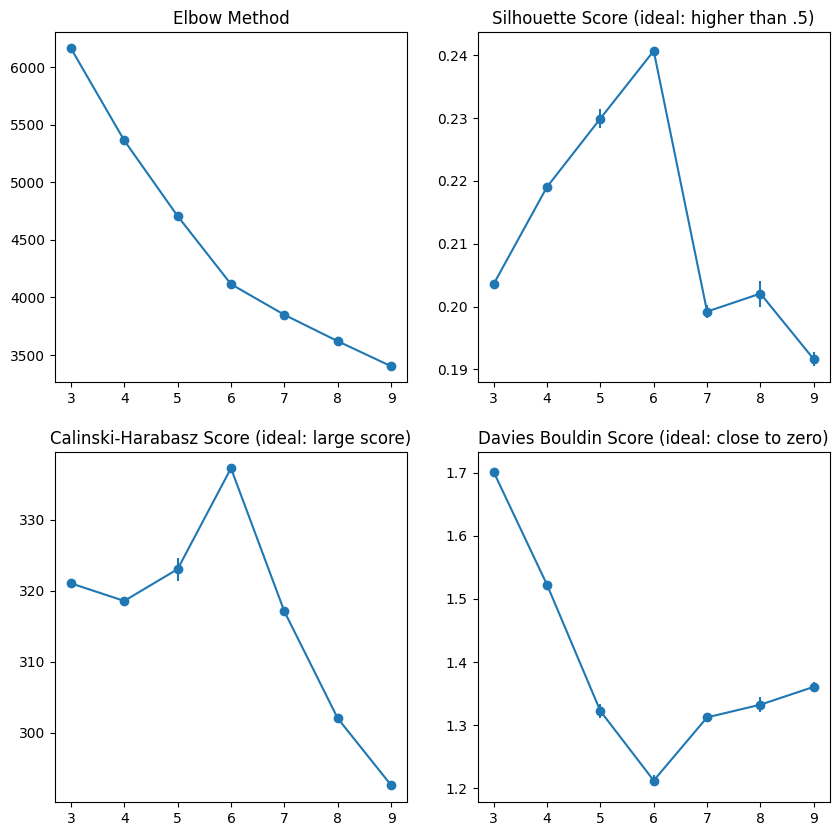

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(k_values, np.mean(inertia, axis=1), linestyle='-', marker='o')
axs[0, 0].errorbar(k_values, np.mean(inertia, axis=1), yerr = np.std(inertia, axis=1, ddof=1), fmt ='none')
axs[0, 0].set_title('Elbow Method')

axs[0, 1].plot(k_values, np.mean(silhouette_scores, axis=1), linestyle='-', marker='o')
axs[0, 1].errorbar(k_values, np.mean(silhouette_scores, axis=1), yerr = np.std(silhouette_scores, axis=1, ddof=1), fmt ='none')
axs[0, 1].set_title('Silhouette Score (ideal: higher than .5)')

axs[1, 0].plot(k_values, np.mean(ch_score, axis=1), linestyle='-', marker='o')
axs[1, 0].errorbar(k_values, np.mean(ch_score, axis=1), yerr = np.std(ch_score, axis=1, ddof=1), fmt ='none')
axs[1, 0].set_title('Calinski-Harabasz Score (ideal: large score)')

axs[1, 1].plot(k_values, np.mean(davies_bouldin_scores, axis=1), linestyle='-', marker='o')
axs[1, 1].errorbar(k_values, np.mean(davies_bouldin_scores, axis=1), yerr = np.std(davies_bouldin_scores, axis=1, ddof=1), fmt ='none')
axs[1, 1].set_title('Davies Bouldin Score (ideal: close to zero)')

### NOTE: 6 clusters may be a good candidate.

### 2. K-Modes

In [8]:
from kmodes.kmodes import KModes

# Store the evaluation scores
inertia = []
silhouette_scores = []
ch_score = []
davies_bouldin_scores = []

# Try several K number of clusters
k_values = range(4, 12)
for k in k_values:
    print(f"k = {k}")

    # Storing the raw scores for each model
    inertia_samples = []
    silhouette_score_samples = []
    ch_score_samples = []
    db_score_samples = []

    # Cluster 10 times to get the average scores
    for _ in range(10):
        print(f"\tj = {_}")
        
        # Clustering Step
        kmodes = KModes(n_clusters=k
                        ,init='Huang'
                        ,n_init=10
                        ,n_jobs=-1)
        kmodes.fit(X)

        # Getting the cluster labels
        labels = kmodes.labels_

        # Elbow method
        inertia_samples.append(kmodes.cost_)
    
        # Get the Silhouette score
        silhouette_score_samples.append(silhouette_score(X, labels))

        # Calinski-Harabasz score 
        ch_score_samples.append(calinski_harabasz_score(X, labels))
        
        # Davies Bouldin Score
        db_score_samples.append(davies_bouldin_score(X, labels))


    # Mean of the metrics
    inertia.append(inertia_samples)
    silhouette_scores.append(silhouette_score_samples)
    ch_score.append(ch_score_samples)
    davies_bouldin_scores.append(db_score_samples)

k = 4
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 5
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 6
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 7
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 8
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 9
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 10
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 11
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9


Text(0.5, 1.0, 'Davies Bouldin Score (ideal: close to zero)')

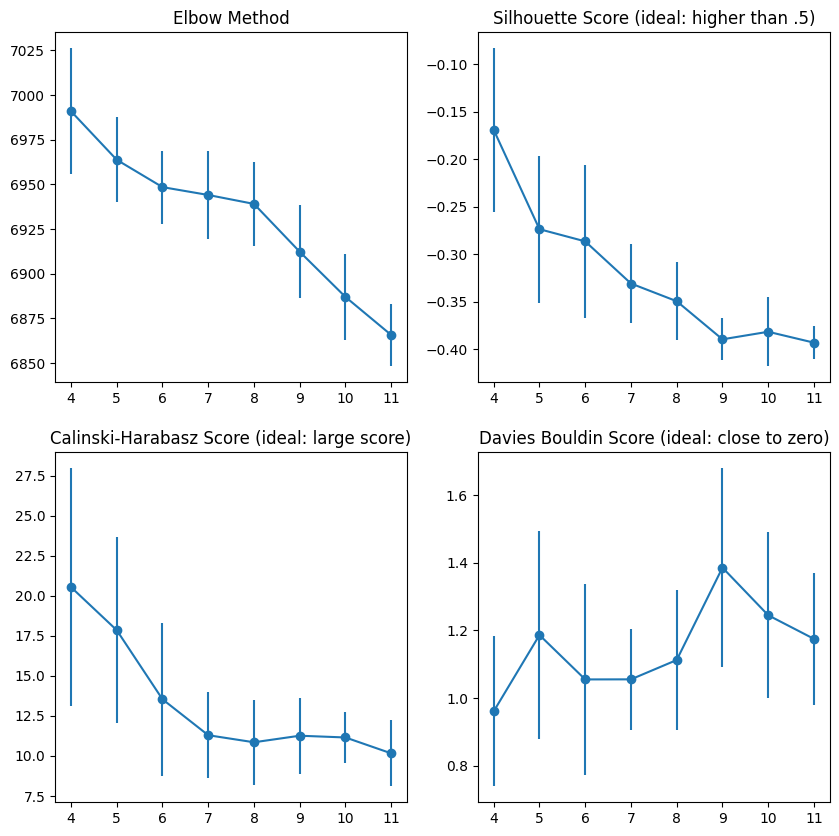

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(k_values, np.mean(inertia, axis=1), linestyle='-', marker='o')
axs[0, 0].errorbar(k_values, np.mean(inertia, axis=1), yerr = np.std(inertia, axis=1, ddof=1), fmt ='none')
axs[0, 0].set_title('Elbow Method')

axs[0, 1].plot(k_values, np.mean(silhouette_scores, axis=1), linestyle='-', marker='o')
axs[0, 1].errorbar(k_values, np.mean(silhouette_scores, axis=1), yerr = np.std(silhouette_scores, axis=1, ddof=1), fmt ='none')
axs[0, 1].set_title('Silhouette Score (ideal: higher than .5)')

axs[1, 0].plot(k_values, np.mean(ch_score, axis=1), linestyle='-', marker='o')
axs[1, 0].errorbar(k_values, np.mean(ch_score, axis=1), yerr = np.std(ch_score, axis=1, ddof=1), fmt ='none')
axs[1, 0].set_title('Calinski-Harabasz Score (ideal: large score)')

axs[1, 1].plot(k_values, np.mean(davies_bouldin_scores, axis=1), linestyle='-', marker='o')
axs[1, 1].errorbar(k_values, np.mean(davies_bouldin_scores, axis=1), yerr = np.std(davies_bouldin_scores, axis=1, ddof=1), fmt ='none')
axs[1, 1].set_title('Davies Bouldin Score (ideal: close to zero)')

### NOTE: Too much variance in the metrics. KModes is not an appropriate clustering algorithm for our TFIDF features because they are not categorical variables.

# Final Clustering model

We choose a K-Means model with ``k = 6``.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

kmeans = KMeans(n_clusters=6, 
                init='k-means++', 
                algorithm='elkan',
                n_init=10)
kmeans.fit(X)

# Put the labels in the original dataframe
df['cluster'] = kmeans.labels_
df.head()

,bagsandluggage,beautyandhealth,capsandhats,drinkware,homeandkitchen,hoodiesandjackets,kidsapparel,office,petsupplies,sportsandfitness,tees,cluster
CustomerID,,,,,,,,,,,,
12346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.745408,0.0,0.000000,0.666608,1
12347,0.155289,0.000000,0.106051,0.128543,0.709425,0.100291,0.058372,0.449272,0.0,0.099013,0.468740,5
12348,0.000000,0.000000,0.000000,0.313489,0.164774,0.000000,0.284711,0.639144,0.0,0.241472,0.571577,5
12350,0.000000,0.000000,0.570106,0.000000,0.726422,0.000000,0.000000,0.000000,0.0,0.133069,0.359978,4
12356,0.088599,0.189432,0.000000,0.220018,0.231290,0.171661,0.199821,0.448575,0.0,0.169474,0.745001,1


# Descriptives

### We load the counts dataframe

In [12]:
df_profiling = pd.read_parquet('../Data/features.parquet.gz')

# Turn the counts into 1 or 0 (customer bought a product from the category or not)
for col in df_profiling.columns:
    df_profiling[col] = np.where(df_profiling[col] > 0, 1, 0)
    
df_profiling = pd.merge(df_profiling, df[['cluster']]
                     ,how='left'
                     ,left_index=True
                     ,right_index=True)
df_profiling.head()

,Caps and Hats,Drinkware,Gift Cards,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,car & motorbike,home & kitchen,office,onesie,pet supplies,sports & fitness,cluster
CustomerID,,,,,,,,,,,,,,,
12346,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1.0
12347,1,1,0,1,1,1,1,0,0,1,1,0,0,1,5.0
12348,0,1,0,0,1,1,0,0,0,1,1,0,0,1,5.0
12350,1,0,0,0,0,1,0,0,0,1,0,0,0,1,4.0
12356,0,1,0,1,1,1,1,1,0,1,1,0,0,1,1.0


### Cluster membership

<Axes: ylabel='cluster'>

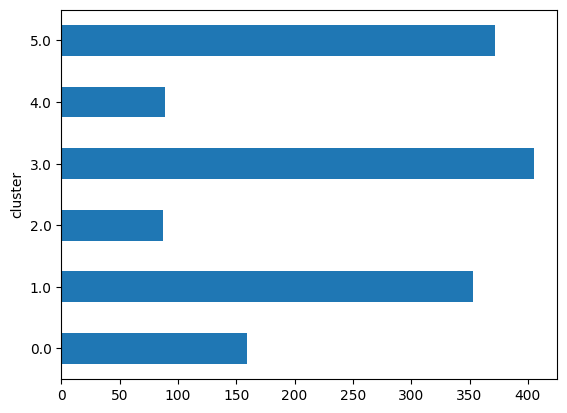

In [13]:
df_profiling['cluster'].value_counts().sort_index().plot(kind='barh')

### Proportions of each category per cluster

### Cluster 0

In [14]:
df_profiling.groupby('cluster').sum().query('cluster == 0') / df_profiling['cluster'].value_counts().sort_index().loc[0]

,Caps and Hats,Drinkware,Gift Cards,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,car & motorbike,home & kitchen,office,onesie,pet supplies,sports & fitness
cluster,,,,,,,,,,,,,,
0.0,0.345912,0.647799,0.031447,0.823899,0.459119,0.886792,0.383648,0.232704,0.119497,0.811321,0.685535,0.157233,0.106918,0.836478


In [22]:
len(df_profiling.query('cluster == 0').index)

159

### Cluster 1

In [15]:
df_profiling.groupby('cluster').sum().query('cluster == 1') / df_profiling['cluster'].value_counts().sort_index().loc[1]

,Caps and Hats,Drinkware,Gift Cards,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,car & motorbike,home & kitchen,office,onesie,pet supplies,sports & fitness
cluster,,,,,,,,,,,,,,
1.0,0.447592,0.597734,0.028329,0.461756,0.351275,1.0,0.399433,0.376771,0.172805,0.798867,0.753541,0.141643,0.152975,0.490085


In [21]:
len(df_profiling.query('cluster == 1').index)

353

### Cluster 2

In [16]:
df_profiling.groupby('cluster').sum().query('cluster == 2') / df_profiling['cluster'].value_counts().sort_index().loc[2]

,Caps and Hats,Drinkware,Gift Cards,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,car & motorbike,home & kitchen,office,onesie,pet supplies,sports & fitness
cluster,,,,,,,,,,,,,,
2.0,0.425287,0.678161,0.045977,0.505747,0.45977,0.896552,0.494253,0.390805,0.16092,0.885057,0.862069,0.206897,1.0,0.425287


In [20]:
len(df_profiling.query('cluster == 2').index)

87

### Cluster 3

In [23]:
df_profiling.groupby('cluster').sum().query('cluster == 3') / df_profiling['cluster'].value_counts().sort_index().loc[3]

,Caps and Hats,Drinkware,Gift Cards,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,car & motorbike,home & kitchen,office,onesie,pet supplies,sports & fitness
cluster,,,,,,,,,,,,,,
3.0,0.417284,0.51358,0.059259,0.390123,0.259259,0.787654,0.419753,0.597531,0.165432,0.992593,0.669136,0.116049,0.093827,0.4


In [25]:
len(df_profiling.query('cluster == 3').index)

405

### Cluster 4

In [27]:
df_profiling.groupby('cluster').sum().query('cluster == 4') / df_profiling['cluster'].value_counts().sort_index().loc[4]

,Caps and Hats,Drinkware,Gift Cards,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,car & motorbike,home & kitchen,office,onesie,pet supplies,sports & fitness
cluster,,,,,,,,,,,,,,
4.0,0.741573,0.359551,0.044944,0.404494,0.685393,0.764045,0.247191,0.168539,0.078652,0.730337,0.617978,0.157303,0.067416,0.292135


##### ``Cluster 4`` has high interest in ``Beauty and Health``.

In [26]:
len(df_profiling.query('cluster == 4').index)

89

### Cluster 5

In [28]:
df_profiling.groupby('cluster').sum().query('cluster == 5') / df_profiling['cluster'].value_counts().sort_index().loc[5]

,Caps and Hats,Drinkware,Gift Cards,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,car & motorbike,home & kitchen,office,onesie,pet supplies,sports & fitness
cluster,,,,,,,,,,,,,,
5.0,0.486559,0.876344,0.080645,0.543011,0.41129,0.884409,0.693548,0.416667,0.188172,0.860215,0.943548,0.215054,0.225806,0.58871


##### ``Cluster 5`` has has high interest in ``Drinkware``, ``Bags and Luggage``, and ``Sports and Fitness``.

In [29]:
len(df_profiling.query('cluster == 5').index)

372